# Introducción al aprendizaje de máquina

### Julián D. Arias Londoño

In [4]:
## Bibliotecas
# Sirve para mostrar las graficas generadas por matplotlib inmediatemente despues de que sea llamada.
%matplotlib inline
from IPython.display import Image

#Numpy es una biblioteca que nos permite muy buen soporte a las operaciones entre matrices y vectores
import numpy as np

# Biblioteca usada para diseñar y mostrar graficos.
import matplotlib.pyplot as plt 
import seaborn as sns
#sns.set(color_codes=True)

# Biblioteca con algoritmos de Machine Learning ya implementados
from sklearn import datasets  # Se importa el modulo de bases de datos de sklearn 

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

### Definicion

El aprendizaje de máquina  (En inglés: Machine Learning (ML)) es una rama de la inteligencia artifical enfocada al estudio de sistemas que pueden ``aprender'' a partir de datos. De acuerdo con [1], ML son un conjunto de métodos que pueden detectar automáticamente patrones en un conjunto de datos, aprenderlos y luego usarlos para predicir datos futuros o realizar otro tipo de decisiones bajo incertidumbre.

Ejemplos de aplicaciones de ML:
<ul>
<li>Reconocimiento de Caracteres escritos a mano </li>
</ul>

![alt text](./Images/HR.png "Reconocimiento de Caracteres escritos a mano")

<li>Reconocimiento de Rostros</li>

![alt text](./Images/facebook-photo.jpeg "Reconocimiento de Rostros")

<li>Biometría</li>

![alt text](./Images/iphone-fingerprint.jpeg  "Biometría")

Otros ejemplos son:

1. Reconocimiento de Caracteres Ópticos
2. Reconocimiento de Tatuajes
3. Filtración de Spam
3. Reconocimiento de Voz
4. Sistemas de Recomendación
5. Pronóstico de Variables Económicas
6. Diversos Sistemas de Ayuda a la Toma de Decisiones

Campos relacionados al ML:

* Data Mining
* Information Retrieval
* Knowledge Discovery
* Pattern Recognition
* Probabilistic Methods
* Natural Computing
* Soft Computing
* Multivariate Statistics
* Optimization and Operation Research
* Intelligent Agents and Intelligent Systems
* Parallel Computing

### Tipos de Aprendizaje de Máquina

#### Aprendizaje predictivo o supervisado (Supervised Learning)

En el cual el objetivo es aprender un mapeo a partir de entradas $\bf{x}$ a salidas $y$, dado un conjunto de pares entrada-salida etiquetados $\mathcal{D} = \left\lbrace  \left( {\bf{x}}_i, y_i \right) \right\rbrace _{i=1} ^{N}$. En este caso $\mathcal{D}$ se conoce como el <b>conjunto de entrenamiento</b> y $N$ es el número de muestras de entrenamiento.

En una forma simple, cada muestra de entrenamiento ${\bf{x}}_i$ es un vector de números $d$-dimensional que representa variables o medidas del sistema o fenómeno que se desea modelar y que en el contexto del aprendizaje de máquinas es común llamarlas <b>características</b> (en inglés <b>features</b>).

![alt text](./Images/Supervised.png  "Supervised")

#### Descriptivo o no supervisado (Unsupervised Learning)

En este caso unicamente se cuenta con un conjunto $\mathcal{D} = \left\lbrace  \left( {\bf{x}}_i \right) \right\rbrace _{i=1} ^{N}$; y el objetivo es encontrar ``patrones interesantes'' en los datos. Algunas veces se le llama <b>Descubrimiento de conocimiento</b>

![alt text](./Images/Unsupervised.png  "Unsupervised")

----------------------------------------------------------------------------------------------------------------------------------------------

#### Tipos de problemas supervisados

En general ${\bf{x}}_i$ puede representar un objeto complejo, como una imagen, una frase, un mensaje de correo electrónico, un cliente, una serie de tiempo, una cadena de ADN, una molécula, un grafo, etc. En el aprendizaje supervisado, si la variable de salida $y_i$ toma valores discretos (es categórica), el problema de aprendizaje se conoce como <b>Clasificación</b>. Si por el contrario $y_i$ toma valores reales, el problema se conoce como <b>Regresión</b>.

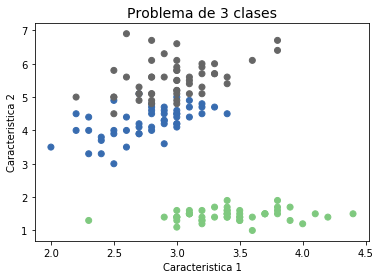

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
import matplotlib.pyplot as plt
plt.title('Problema de 3 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,1], X[:,2],c=y,cmap="Accent")
plt.show()

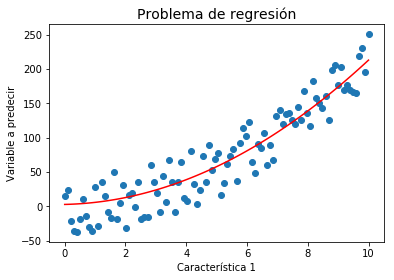

In [8]:
a = np.array([1, 2, 3])
x = np.linspace(0,10,100);
y1 = np.zeros(100)
y2 = np.zeros(100)
for i in range(len(x)):
    b = np.array([x[i],x[i]**2,1])
    y1[i] = sum(a*b +  30*(np.random.rand() - 0.5))
    y2[i] = sum(a*b)
plt.title(u'Problema de regresión', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Variable a predecir')
plt.scatter(x, y1)
plt.plot(x,y2,'r')
plt.show()

### Sistemas de reconocimiento de patrones

![alt text](./Images/Diagram.png  "Supervised")

#### Retos (Challenges) que deben ser enfrentados dentro del aprendizaje de máquina

Cuando nos enfrentamos a un problema de aprendizaje vamos a encontrarnos con una serie de situaciones que haran la tarea un problema no trivial.

<b>Clasificación</b>
<li>Las clases son colecciones de objetos no necesariamente idénticos, entonces cada clase queda definida por las muestras con las que se cuente para entrenar el sistema (<b>Data-driven model</b>)</li>

![alt text](./Images/ICVariability.png  "ICVariability")

![alt text](./Images/ICSimilarity.png  "ICSimilarity")

#### Diseño de la etapa de aprendizaje

Cuando nos enfrentamos al problema de aprendizaje de máquina debemos responder a tres preguntas fundamentales:
<li>Cuál es el <b>modelo</b> que vamos a usar teniendo en cuenta el problema a resolver, es decir la estructura que tiene el conjunto de datos. Es importante tener en cuenta que todo modelo tiene parámetros que se deben ajustar para que pueda adaptarse (aprender), el problema particular que deseamos abordar</li>
<li>Cuál es el <b>criterio</b> de ajuste del modelo que vamos a usar. Es decir determinar qué es lo que queremos que haga el modelo con respecto al conjunto de muestras de entrenamiento y expresarlo a través de una función matemática.</li>
<li>Cuál es y cómo funciona el <b>algoritmo</b> que encuentra los parámetros del modelo de acuerdo al criterio escogido. En la mayoría de los casos la ejecución del criterio de entrenamiento implica un procedimiento de maximización (o minimización) de la función criterio. Por consiguiente en esta etapa necesitamos aplicar un algoritmo que pueda solucionar el problema de optimización.</li>
<li>Como todo procedimiento de modelado, el aprendizaje de máquina debe pasar por etapas de verificación y validación que permitan establecer el correcto funcionamiento del modelo propuesto y cuantificar su desempeño en términos objetivos.</li>

----------------------------------------------------------------------------------------------------------------------------------------------

## Modelos básicos de aprendizaje

Vamos a centrarnos por un momento en el problema de regresión. Es casi seguro que para diferentes problemas hayan tenido que utilizar una regresión lineal, polinomial y/o múltiple, con el propósito de encontrar una función que pudiera explicar el comportamiento de un conjunto de datos. Supongamos que queremos modelar un conjunto de datos empleando una función polinomial de la forma:


$$
f({\bf{x}},{\bf{w}} ) = w_0 + w_1 x +  w_2 x^2 + \cdots + w_Mx^M = \sum_{j=0}^{M} w_j x^j
$$

donde $M$ es el orden del polinomio. ¿Cómo se ajusta ${\bf{w}}$?

En este caso particular, la función polinomial que hemos escogido corresponde al <mark>modelo</mark> que vamos a usar. Necesitamos entonces definir el criterio por el cual vamos a ajustar los parámetros del modelo, en particular los pesos $w_j$ (El valor de $M$ también requiere ser ajustado, sin embargo si cambiamos $M$ se está cambiando el órden del polinomio y por lo tanto el modelo en sí mismo. Más adelante veremos cómo enfrentar el problema de seleccionar el modelo más adecuado, por ahora supondremos que el valor de $M$ está dado de manera a prior). 

<mark>El criterio:</mark>
La función de error más usada es (<b>para un mismo modelo podemos tener diferentes criterios de ajuste</b>):
$$
E({\bf{w}}) = \frac{1}{2N}\sum_{i=1}^{N} \left\lbrace f({\bf{x}}_i, {\bf{w}}) - y_i \right\rbrace^2 
$$
Con esta función de error podemos hallar una $f$ para la cual, la distancia perpendicular de los puntos $x_i$ a $f$ sea mínima.

![alt text](./Images/Regression.png  "Regression")

Si queremos hayar un $\bf{w}$ que minimize el error entonces, derivamos la función de error con respecto a cada uno de los parámetros $w_j$:

$$
\frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\frac{\partial }{\partial w_j}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right)^2\\
$$

Para efectos de cálculo podemos asumir que el vector $x_i$ contiene todas las características de la muestra $i$ y una característica adicional con valor de 1, que multiplicará al término independiente $w_0$.

$$
\frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right) \frac{\partial }{\partial w_j} f({\bf{x}}_i, {\bf{w}})
$$


$$
\frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right)x_{ij}
$$

Un algoritmo simple que nos permite solucionar el problema de optimización es el <mark>Algoritmo</mark> de Gradiente Descendente. Un problema de optimización puede tener múltiples formas o algoritmos para resolverse, cuando el problema de optimización es <b>convexo</b> podemos esperar que casi con cualquier método encontremos el valor del parámetro que hace la función óptima, sin embargo, es posible que el problema de optimización no sea convexo, en cuyo caso el algoritmo o método de optimización juega un rol más importante. También es importante tener en cuenta la velocidad de convergencia del algoritmo o método de optimización, el costo computacional y el número de parámetros libres.

El algoritmo de gradiente descendente es un algoritmo iterativo que va actualizando los pesos $w_j$ en la medida en que estos van haciendo la función objetivo mínima. La regla de actualización de los pesos en cada iteración está dada por:

$$
w_j(iter) = w_j(iter-1) - \eta \frac{\partial E({\bf{w}})}{\partial w_j}
$$


$$
w_j(iter) = w_j(iter-1) - \eta \sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right)x_{ij}
$$


$$
w_j(iter) = w_j(iter-1) - \eta \sum_{i=1}^{N}\left( \sum_{k=0}^{d} w_k x_{ik} - y_i\right)x_{ij} 
$$

donde $\eta$ se conoce como la tasa de aprendizaje y $d$ es el número de variables, independiente de si son polinomiales o no. Para entender un poco qué hace el algoritmo, consideremos la siguiente <em>Función Convexa</em>

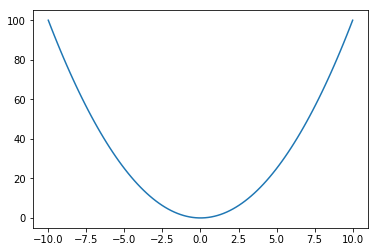

In [5]:
x = np.linspace(-10,10,100);
y = x ** 2;
plt.plot(x,y)

Existen múltiples librerías para diferentes lenguajes que tienen implementados algoritmos de regresión, sin embargo con el objetivo de comprender el problema de aprendizaje en su conjunto, vamos a hacer una implementación simple del problema de regresión múltiple.  Como vamos a ir viendo a lo largo del curso es importante tener claros varios conceptos de cálculo, probabilidades y algebra lineal, que pueden no ser trasendentales si sólo nos limitamos a usar modelos y algoritmos existentes en diferentes librerías, pero que serán vitales a la hora de enfrentarnos a problemas en los cuales los modelos existentes no satisfacen todas las restricciones de un problema en particular.

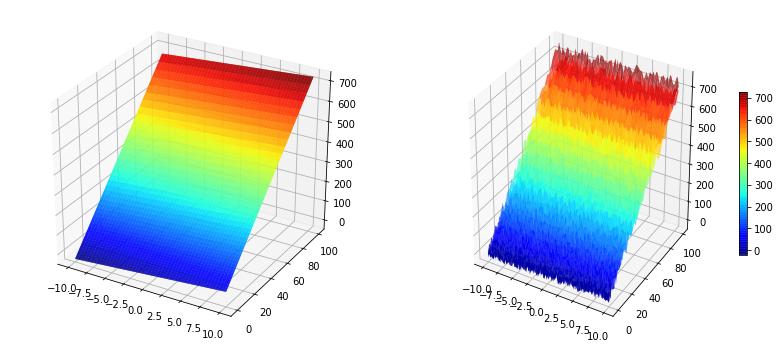

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
Perror = 0.3
fig = plt.figure(figsize=(14,6))
x1 = np.linspace(-10,10,100).reshape(100, 1)
x2 = x1**2
y = 3*x1 + 7*x2 - 2
y2 = y + Perror*np.std(y)*(np.random.rand(100,1) - 0.5)
X1, X2 = np.meshgrid(x1, x2)
Y = 3*X1 + 7*X2 - 2
Y2 = y + Perror*np.std(y)*(np.random.rand(100,100) - 0.5)
ax = fig.add_subplot(1, 2, 1, projection='3d')
p=ax.plot_surface(X1, X2, Y, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)

## surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X1, X2, Y2, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
cb = fig.colorbar(p, shrink=0.5)

#### Gradiente descendetente

[[ 2.81995203]
 [ 6.99440223]
 [-4.73105451]]
(' Error = ', 162.0798693563429)


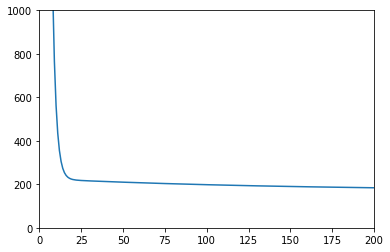

In [8]:
MaxIter = 100000
w = np.ones(3).reshape(3, 1)
eta = 0.0001
N = len(x1)
Error =np.zeros(MaxIter)
X = np.array([x1,x2,np.ones((100,1))]).reshape(3, 100);
for i in range(MaxIter):
    tem = np.dot(X.T,w)
    tem2 = tem-np.array(y2)
    Error[i] = np.sum(tem2**2)/(2*N)
    tem = np.dot(X,tem2)
    wsig = w - eta*tem/N
    w = wsig
print(w)
print(' Error = ',Error[-1])
plt.ylim(0,1000)
plt.xlim(0,200)
plt.ion()
plt.plot(np.linspace(0,MaxIter,MaxIter),Error)
plt.show()

Comparando el resultado obtenido, vemos que el algoritmo de gradiente descendente encontró los siguientes coeficientes: 2.8199 (El original era 3), 6.994 (El original era 7) y -4.731 (El original era -2). Es necesario tener en cuenta que a los datos originales les fue añadido un 30% de error, razón por la cual el algoritmo no necesariamente va a obtener los valores exactos de los coeficientes. Sin embargo, podemos observar que hizo una estimación bastante aceptable.

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_line(num, data, line):
    line.set_data(data[...,:num])
    return line,

fig1 = plt.figure()

data = np.array([np.linspace(0,100000, 100000),Error])
l, = plt.plot([], [], 'r-')
plt.xlim(0, 200)
plt.ylim(0, 1000)
plt.xlabel('x')
plt.title('Gradiente decendente')
line_ani = animation.FuncAnimation(fig1, update_line, 200, fargs=(data, l),
    interval=20, blit=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

----------------------------------------------------------------------------------------------------------------------------------------------

## El aprendizaje desde un punto de vista probabilístico

Pensemos ahora en el problema de clasificación. 

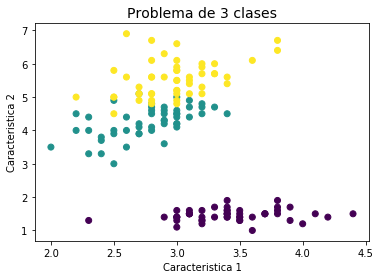

In [12]:
%matplotlib inline
iris = datasets.load_iris()
X, y = iris.data, iris.target
import matplotlib.pyplot as plt
plt.title('Problema de 3 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

El objetivo en este caso es encontrar un modelo o modelos que nos permitan decidir a qué clase pertenece una muestra. Una de las formas que podemos encontrar para solucionar el problema, es representar cada una de las clases a partir de la función de densidad de probabilidad obtenida a partir de la muestra. Cuando llegue una muestra nueva, evaluamos que probabilidad tiene de pertenecer a cada clase de acuerdo con las funciones que construimos, y la asignamos a la clase más probable.

Al igual que en el caso anterior debemos escoger un modelo, en este caso un fdp, que representará cada clase. Supongamos que escogemos un <mark>modelo</mark> de fdp Gausiana, que para el caso de una única variable está dada por:

$$
f(x)=\mathcal{N}(x|\mu,\sigma^2) = \frac{1}{(2\pi\sigma^2)^{1/2}}\exp\left\lbrace  -\frac{1}{2\sigma^2} (x - \mu)^2 \right\rbrace 
$$

donde $\mu$ es la media de la distribución y $\sigma$ es la desviación estándar. En este caso el entrenamiento del modelo pasará por ajustar los valores de $\mu$ y $\sigma$, sin embargo, en múltiples ocasiones hemos tenido que calcular la media y la desviación de un conjunto de datos $\left\lbrace x_i \right\rbrace_1^N$ y hemos utilizado las fórmulas de la media y la varianza muestral dadas por:

$$ \hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} x_i \;\;\;\;\; \hat{\sigma}^2 = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2  $$

Las ecuaciones anteriores pueden ser optenidas si aplicamos el <mark>criterio</mark> de máxima verosimilitud al la función de distribución Gausiana. Asumiendo que las muestras $x_i$ son independeientes e identicamente distribuidas (i.i.d), la función de verosimilitud del conjunto completo de datos estará dada por:
$$
p({\bf{x}}|\mu,\sigma^2) = \prod_{i=1}^{N}\mathcal{N}(x_i|\mu,\sigma^2)
$$

Teniendo en cuenta que el producto al lado derecho de la ecuación anterior, es un producto de valores que están en el intervalo $[0,1]$, el producto puede hacerse muy pequeño. Para evitar ese problema típicamente se usa puede usar como criterio de ajuste del modelo el logaritmo de la función de verosimilitud

$$
{\mathcal L} = \ln p({\bf{x}}|\mu,\sigma^2) = -\frac{1}{2\sigma^2}\sum_{i=1}^{N}(x_i-\mu)^2 - \frac{N}{2}\ln \sigma^2 - \frac{N}{2}\ln(2 \pi)
$$

El objetivo es entonces minimizar la función anterior, se puede entonces derivar e igualar a cero:
$$
\frac{{\partial {\mathcal L}}}{{\partial \mu }} = 0 \to  - \frac{1}{{\sigma ^2 }}\sum\limits_{i = 1}^N {\left( {x_i  - \mu } \right)}  = 0
$$

Despejando con respecto a $\mu$ se puede obtener la ecuación de la media muestral vista antes. De igual manera se puede derivar con respecto a $\sigma^2$ y obtener la fórmula de la varianza muestral:

$$
\frac{{\partial {\mathcal L}}}{{\partial \sigma ^2 }} = 0 \to \sum\limits_{i = 1}^N {\frac{1}{{2\sigma ^2 }} - \frac{{\left( {x_i  - \mu } \right)^2 }}{{2\sigma ^4 }}}  = \frac{N}{{2\sigma ^2 }} - \frac{1}{{2\sigma ^4 }}\sum\limits_{i = 1}^N {\left( {x_i  - \mu } \right)^2 }  = 0
$$

$$\frac{1}{{2\sigma ^2 }}\left( {N - \frac{1}{{\sigma ^2 }}\sum\limits_{i = 1}^N {\left( {x_i  - \mu } \right)^2 } } \right) = 0 \to \hat \sigma ^2  = \frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i  - \mu } \right)^2 } $$

En este el <mark>algoritmo</mark> de solución fue simplemente derivar la función a optimizar e igualar a cero, ya que fue posible despejar los parámetros y encontrar fórmulas cerradas para su cálculo a partir del conjunto de muestras de entrenamiento. En el caso más simple, el procedimiento completo de clasificación basado en fdp Gausianas consiste en estimar una función $f_k$ por cada una de las $K$ clases a reconocer y posteriormente cuando se tenga una nueva muestra $x*$, la clase $C*$ a la cual será asignada la muestra corresponderá a:

$$
C* = \mathop {\arg \max }\limits_k f_k(x*)
$$

Regresemos nuevamente al problema de regresión. Una vez más supongamos que queremos modelar un conjunto de datos empleando una función polinomial de la forma:


$$
f(x,{\bf{w}} ) = w_0 + w_1 x +  w_2 x^2 + \cdots + w_Mx^M = \sum_{j=0}^{M} w_j x^j
$$

Pensando en la incertidumbre que tenemos sobre el valor observado ${\bf{y}} = (y_1,y_2,...,y_N)$. Consideremos que el valor de $y_i$ dado $x_i$ sigue una distribución Gausiana con media $\mu = f(x_i, {\bf{w}})$ y varianza $\beta$, entonces:

$$
p(y_i|x_i,{\bf{w}},\beta) = \mathcal{N}(y_i|f(x_i,{\bf{w}}),\beta)
$$

Debemos usar el conjunto de datos de entrenamiento para determinar $\bf{w}$ y $\beta$. Si suponemos que los datos son i.i.d. entonces podemos plantear el problema de aprendizaje a partir del criterio de máxima verosimilitud como:
$$
p({\bf{y}} | {\bf{x}}, {\bf{w}}, \beta) = \prod_{i=1}^{N} \mathcal{N}(y_i|f(x,{\bf{w}}),\beta)
$$

Usando la misma transformación logarítmica de antes obtenemos:
$$
\ln p({\bf{y}} | {\bf{x}}, {\bf{w}}, \beta) = -\frac{1}{2 \beta}\sum_{i=1}^{N}(y_i-f(x,{\bf{w}}))^2 - \frac{N}{2}\ln \beta - \frac{N}{2}\ln(2 \pi)
$$

Si tenemos en cuenta que:
<li>Maximizando con respecto a $\bf{w}$ vemos que los dos últimos términos pueden despreciarse</li>
<li>Si asumimos que $\beta = 1$, no cambia en nada el valor de $\bf{w}$</li>
<li>Si en lugar de maximizar una función $g$ minimizamos $-g$, llegaremos al mismo resultado.</li>


Llegamos a la conclusión que necesitamos minimizar:

$$
\frac{1}{2}\sum_{i=1}^{N}\left( y_i - f(x_i,{\bf{w}})\right)^2 = E({\bf{w}})
$$

Por consiguiente una regresión polinomial es un modelo de aprendizaje que asume un criterio de máxima verosimilitud bajo la suposición de que en los datos existe ruido con distribución Gausiana [2]. Gran parte de los métodos usados en aprendizaje de máquina pasan por la suposición de diferentes $f$, es decir, por cambiar el modelo que describe los datos observados, lo que implica también seleccionar o determinar un criterio de aprendizaje y usar o proponer un algoritmo que permita ajustar los parámetros del modelo propuesto a partir del conjunto de muestras de entrenamiento.

----------------------------------------------------------------------------------------------------------------------------------------------

### Regresión logística

Una forma alternativa de entender el problema de clasificación, es buscar una función que sea capaz de dividir el espacio de características y dejar los conjuntos de muestras de cada clase separados.

![alt text](./Images/Classification.png  "ICSimilarity")

Cuando es posible dejar todas las muestras de una clase a un lado de la recta, y las muestras de la otra clase al otro, el problema se conoce como linealmente separable. Sin embargo eso no sucede en la gran mayoría de problemas reales. El problema de clasificación se puede entonces pensar como el problema de encontrar una función polinomial $f$ que pueda dividir los conjuntos de datos de las diferentes clases.

Si se pudiese encontrar la función dada por la línea negra en la figura anterio, la cual sería de la forma $f({\bf{x}}) = w_1 x_1 + w_2 x_2 + w_0$, se podría utilizar como función de clasificación ya que cualquier muestra evaluada en la función obtendrá como resultado un valor positivo si se ubica a un lado y un valor negativo si se ubica al otro (los valores ubicados justo en la función obtendrían un valor de 0). Teniendo en cuenta que los valores de las etiquetas para el problema de clasificación (las variables a predecir $y_i$), solo pueden tomar dos valores ${0,1}$, entonces una forma simple de usar la función $f$ como clasificador sería asignar las muestras a la clase 1 cuando al ser evaluadas en la función $f$ obtengan una valor positivo y asignar 0 cuando suceda lo contrario.

![alt text](./Images/funcionsigno.png  "ICSimilarity")

El problema con la función $sgn$ es que es discontinua y no puede ser usada como criterio de optimización para ningún algoritmo basado en gradiente. Un alternativa es utilizar alguna función que tenga una comportamiento asintótico similar pero que sea continua y derivable, por lo que podemos usar la función sigmoide dada por:

$$
g(u) = \frac{\exp(u)}{1 + \exp(u)}
$$

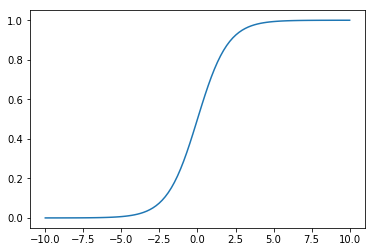

In [13]:
u=np.linspace(-10,10,100)
g = np.exp(u)/(1 + np.exp(u))
plt.plot(u,g)
plt.show()


El método que utiliza la función sigmoidal para encontrar una frontera de separación polinomial se conoce como <b>Regresión Logística</b>. La función objetivo (criterio de entrenamiento) está dada por:

$$
J({\bf{w}}) = \frac{1}{N} \sum_{i=1}^{N} -y_i \log(g(f({\bf{x}}))) - (1-y_i)\log(1 - g(f({\bf{x}})))
$$

Si se analiza con detenimiento, la función criterio $J$ minimiza el error de clasificación. Es necesario tener en cuenta que dicha función está definida para $y_i$ que toman valores $\left\lbrace 0,1 \right\rbrace$. La ventaja del método de regresión logística es que la función para la actualización de los pesos $\bf{w}$ es muy similar a la función para la regresión lineal. La derivada de $J$ está dada por:

$$
\frac{\partial J({\bf{w}})}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N}\left( g(f({\bf{x}}_i,{\bf{w}})) - y_i\right)x_{ij}
$$

La única diferencia es la inclusión de la función sigmoidal $g$. Por esa razón podemos usar el mismo algoritmo con solo una pequeña modificación. 

[[ 2.9576729 ]
 [-5.17709016]
 [-0.01983321]]
Error= 0.08735688067236808


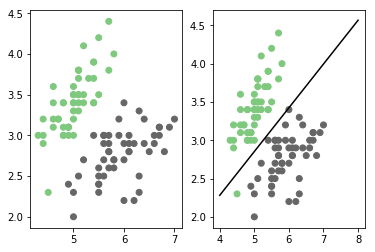

In [25]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.scatter(X2[:,0], X2[:,1], c=y2, cmap="Accent");
def sigmoide(u):
    g = np.exp(u)/(1 + np.exp(u))
    return g
#Aprendizaje
MaxIter = 100000
w = np.ones(3).reshape(3, 1)
eta = 0.001
N = len(y2)
Error =np.zeros(MaxIter)
Xent = np.concatenate((X2,np.ones((100,1))),axis=1)

for i in range(MaxIter):
    tem = np.dot(Xent,w)
    tem2 = sigmoide(tem.T)-np.array(y2)
    Error[i] = np.sum(abs(tem2))/N
    tem = np.dot(Xent.T,tem2.T)
    wsig = w - eta*tem/N
    w = wsig
print(w)
print('Error=',Error[-1])
#Grafica de la frontera encontrada
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
ax1.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent");
x1 = np.linspace(4,8,20)
x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
ax1.plot(x1,x2,'k')

#### Bibliografy